# Project 2 - Ames Housing Data and Kaggle Challenge
---

## 02. Preprocessing and Modeling
---

### Import Libraries
---

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

### Import Cleaned Data
---

In [164]:
df = pd.read_csv("../datasets/train_cleaned.csv")

### Preprocessing
---

In [165]:
# Create feature matrix and target variable
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

#### One-Hot Encoding

Out of our selected variables, Neighborhood is a categorical variable that would need to be dummified for our modeling process.

In [166]:
# Create dummy variables for Neighborhood column
X = pd.get_dummies(X, columns=["Neighborhood"], drop_first=True)

#### Train-Test Split

In [167]:
# Create train-test split of our training data with default test size and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Scaling the Data

In [168]:
# Instantiate Standard Scaler
ss = StandardScaler()

# Fit and scale values of X_train
Z_train = ss.fit_transform(X_train)

# Scale value of X_test
Z_test = ss.transform(X_test)

### Modeling
---

#### Baseline Score

Our baseline model is a model that would predict the sale price for each row as the mean of the sale price values.

In [205]:
# Create predictions for baseline model
y_base_pred = y.apply(lambda x: y.mean())

# Calculate RMSE and R2 score
baseline_rmse = metrics.mean_squared_error(y, y_base_pred, squared=False)
baseline_r2 = metrics.r2_score(y, y_base_pred)

# Print RMSE for baseline model
print(f'Baseline model RMSE: {baseline_rmse}')
# Print R2 score for baseline model
print(f'Baseline model R2: {baseline_r2}')

Baseline model RMSE: 79239.33504161824
Baseline model R2: 0.0


#### Linear Model

In [170]:
# Instantiate Linear Regression Model
lr = LinearRegression()

# Fit linear regression model to scaled training data
lr.fit(Z_train, y_train)

LinearRegression()

In [216]:
# Calculate RMSEs for the training and tests for our linear model

# Create predictions on training and test data
y_train_pred = lr.predict(Z_train)
y_test_pred = lr.predict(Z_test)

# Calculate RMSE
lr_train_rmse = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
lr_test_rmse = metrics.mean_squared_error(y_test, y_test_pred, squared=False)

# Print RSME
print(f'RMSE (Training data): {lr_train_rmse}')
print(f'RMSE (Test data): {lr_test_rmse}')

RMSE (Training data): 33810.648101169565
RMSE (Test data): 32376.191680317734


Our model appears to perform better than our baseline model with RMSEs lower than the baseline model, meaning that there's less error between our model's predicted values and the true values, than the baseline model.

We can also evaluate the predictive accuracy of our model by looking at the R2 scores it generates. We'll calculate these scores on both the entire training and test sets and with cross-validation.

In [212]:
# Print mean cross val scores on training data and test data

print(f'Training Data average cross-validation R2 score: {cross_val_score(lr, Z_train, y_train).mean()}')
print(f'Test Data average cross-validation R2 score: {cross_val_score(lr, Z_test, y_test).mean()}')

Training Data average cross-validation R2 score: 0.7929564564357293
Test Data average cross-validation R2 score: 0.807979549109114


In [213]:
# Calculate R2 scores
lr_train_r2 = lr.score(Z_train, y_train)
lr_test_r2 = lr.score(Z_test, y_test)

# Print R2 scores for training data and test data
print(f'Training Data R2: {lr_train_r2}')
print(f'Test Data R2: {lr_test_r2}')

Training Data R2: 0.8192495424099672
Test Data R2: 0.8292811782099132


The above R2 scores produced by our model tell us that approximately 80% of the variance between the target's true values from the target's mean (baseline model) can be explained by our model.

#### Ridge Model

Although our current linear regression model does not appear to have much variance (it appears to predict similarly well on the training data as the test data), we'll evaluate whether a ridge model would serve better as a production model anyway.

In [174]:
# Create list of alpha values to try with our ridge model
r_alphas = np.logspace(0,5,100)

# Instantiate ridge model with 5 cross-validation folds
ridge = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

In [175]:
# Fit ridge model on training data

ridge.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [217]:
# Calculate RMSEs for the training and tests for our ridge model

# Create predictions on training and test data
y_train_pred_ridge = ridge.predict(Z_train)
y_test_pred_ridge = ridge.predict(Z_test)

# Calculate RMSE
ridge_train_rmse = metrics.mean_squared_error(y_train, y_train_pred_ridge, squared=False)
ridge_test_rmse = metrics.mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# Print RSME
print(f'RMSE (Training data): {ridge_train_rmse}')
print(f'RMSE (Test data): {ridge_train_rmse}')

RMSE (Training data): 33897.59450500945
RMSE (Test data): 33897.59450500945


In [218]:
# Calculate R2 scores
ridge_train_r2 = ridge.score(Z_train, y_train)
ridge_test_r2 = ridge.score(Z_test, y_test)

# Print R2 scores for training data and test data
print(f'Training Data R2: {ridge_train_r2}')
print(f'Test Data R2: {ridge_test_r2}')

Training Data R2: 0.8183187226807436
Test Data R2: 0.8296687565059074


The R2 scores produced by our ridge model are very similar to the scores produced by our linear regression model without regularization.

#### Lasso Model

In [178]:
# Create list of alpha values to try with a Lasso model
l_alphas = np.logspace(-3, 0, 100)

# Instantiate Lasso model with our alpha values
lasso = LassoCV(alphas = l_alphas, cv=5, max_iter = 50_000, n_jobs=-1)

In [179]:
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000, n_jobs=-1)

In [219]:
# Calculate RMSEs for the training and tests for our lasso model

# Create predictions on training and test data
y_train_pred_lasso = lasso.predict(Z_train)
y_test_pred_lasso = lasso.predict(Z_test)

# Calculate RMSE
lasso_train_rmse = metrics.mean_squared_error(y_train, y_train_pred_lasso, squared=False)
lasso_test_rmse = metrics.mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# Print RSME
print(f'RMSE (Training data): {lasso_train_rmse}')
print(f'RMSE (Test data): {lasso_test_rmse}')

RMSE (Training data): 33810.66679170345
RMSE (Test data): 32375.607281149372


In [220]:
# Calculate R2 scores
lasso_train_r2 = lasso.score(Z_train, y_train)
lasso_test_r2 = lasso.score(Z_test, y_test)

# Print R2 scores for training data and test data

print(f'Training Data R2: {lasso_train_r2}')
print(f'Test Data R2: {lasso_test_r2}')

Training Data R2: 0.8192493425721247
Test Data R2: 0.8292873411977064


Like our ridge model, our lasso model does not appear to provide any improvement over the scores of our linear regression model without regularization.

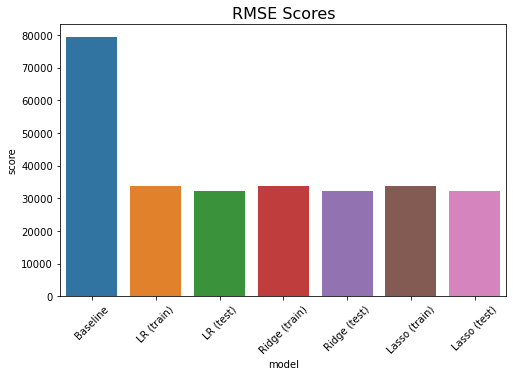

In [247]:
# Plot RMSE and R2 Scores of Models

# Create dataframe with scores
rmse_scores_df = pd.DataFrame(
    {"score": [baseline_rmse, lr_train_rmse, lr_test_rmse, ridge_train_rmse, ridge_test_rmse, lasso_train_rmse, lasso_test_rmse],
     "model":["Baseline", "LR (train)", "LR (test)", "Ridge (train)",
             "Ridge (test)", "Lasso (train)", "Lasso (test)"]
    })
r2_scores_df = pd.DataFrame(
    {"score": [baseline_r2, lr_train_r2, lr_test_r2, ridge_train_r2, ridge_test_r2, lasso_train_r2, lasso_test_r2],
     "model": ["Baseline", "LR (train)", "LR (test)", "Ridge (train)",
             "Ridge (test)", "Lasso (train)", "Lasso (test)"]
    })

rmse_scores_df["type"] = "rmse"
r2_scores_df["type"] = "r2"
scores_df = pd.concat([rmse_scores_df, r2_scores_df])

# Plot bar chart of RMSE
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.title("RMSE Scores", fontsize=16)
sns.barplot(data=scores_df[scores_df["type"]=="rmse"], x="model", y="score");

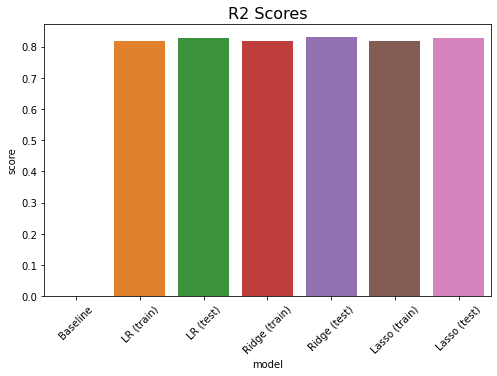

In [250]:
# Plot bar chart of RMSE
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.title("R2 Scores", fontsize=16)
sns.barplot(data=scores_df[scores_df["type"]=="r2"], x="model", y="score");

### Inference from our Linear Model
---

With the hope of improving our model in the future, we can look to see what relationships we can infer from our model between the features of a property and its predicted sales price.

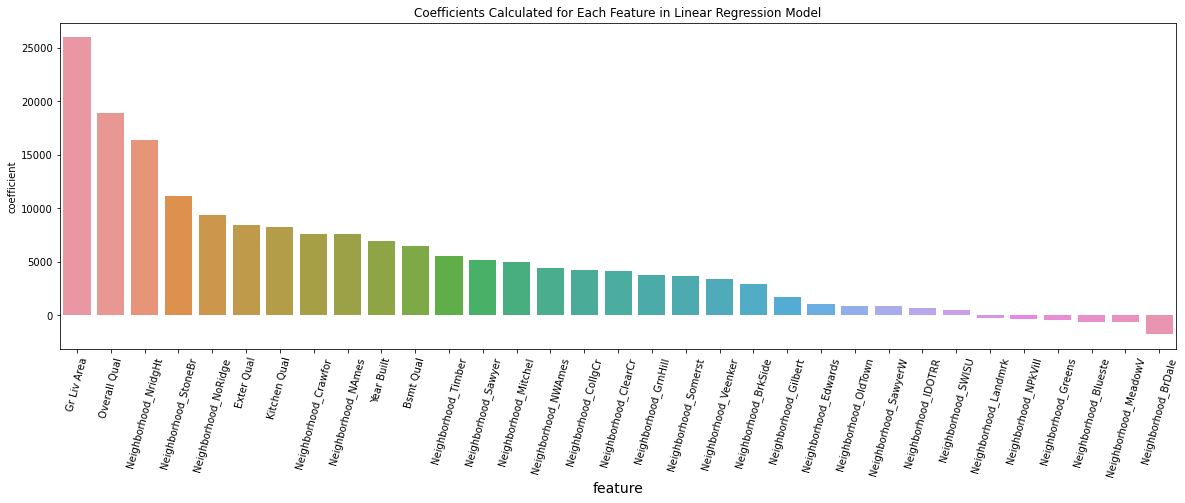

In [200]:
# Print coefficients determined by our linear regression model

coefficient_list = pd.DataFrame(list(zip(X_train.columns, lr.coef_)), columns=["feature", "coefficient"]).sort_values("coefficient", ascending=False)

# Plot barchart of coefficients
plt.figure(figsize=(20,6))
plt.xticks(rotation=75)
plt.title("Coefficients Calculated for Each Feature in Linear Regression Model")
plt.xlabel("Feature", fontsize=14)
sns.barplot(x=coefficient_list["feature"], y=coefficient_list["coefficient"]);

Each of these coefficients can be interpreted as meaning that if all other variables are held constant, each unit increase in the value of a feature leads to an increase in the sale price by the amount of that feature's coefficient. In the case of the quality rating features, that unit would be a unit increase in the rating. With respect to the Gr Liv Area feature, that unit would correspond with an increase in square footage. For the neighborhood dummy variables, the coefficients can be interpreted as meaning that inclusion in that neighborhood would increase (or decrease) the sale price of the property by the amount of its coefficient.

However, before we can rely on these coefficients, we need to determine whether our model can be used for inference. In order for our model to qualify, we test whether it satisfies the LINE(M) assumptions.

#### Linearity of Features with respect to Sale Price

We confirmed that this assumption is satisfied pursuant to our earlier EDA.

#### Independence of Samples

Without evidence otherwise, we will assume this is satisfied.

#### Normality of Errors

In [182]:
# Calculate residual errors for training data and test data
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

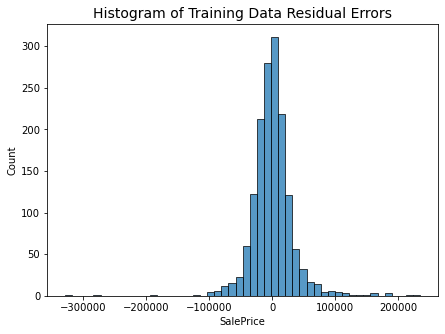

In [183]:
# Plot histogram of training residuals

plt.figure(figsize=(7,5))
sns.histplot(residuals_train, bins=50);
plt.title("Histogram of Training Data Residual Errors", fontsize=14);

Except for a few outliers to the left, the distribution of our training data residuals looks to be normal.

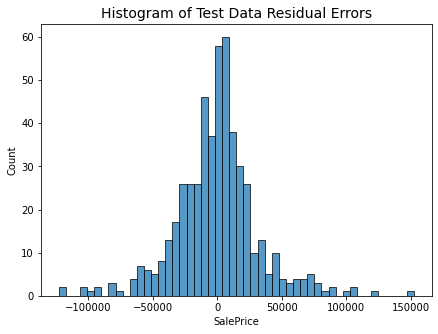

In [184]:
# Plot histogram of test residuals

plt.figure(figsize=(7,5))
sns.histplot(residuals_test, bins=50);
plt.title("Histogram of Test Data Residual Errors", fontsize=14);

The distribution of the residuals from our test data appears to be normal as well.

#### Equal Variance of Errors

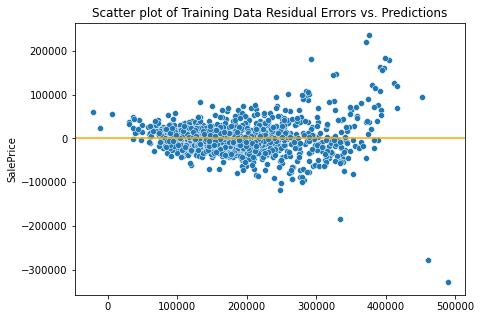

In [185]:
# Plot scatter plot of our residual errors against the predictions on our training data

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.title("Scatter plot of Training Data Residual Errors vs. Predictions");
plt.axhline(0, color="orange");

This assumption does not appear to be completely satisfied throughout the range of sale price values. It appears that as sale price increases, our model has a tendency to underpredict the actual sale price (and in a few outlier cases, over predict). However, for the lower sale prices, our errors do seem fairly randomly dispersed.

#### No Multi-Collinearity/Independence of Predictors

Based on a review of correlation heatmaps of each of our features, the majority of the dummy variables created from the Neighborhood column do not have a correlation value with any other feature greater than 0.25. The following is an analysis of the correlations among the features after those dummy variables are dropped.

In [186]:
# Create list of features for correlation analysis
correlation_features = ["Overall Qual", "Exter Qual", "Kitchen Qual", "Bsmt Qual", "Year Built", "Gr Liv Area", 'Neighborhood_NoRidge', "Neighborhood_NridgHt",
                        "Neighborhood_Somerst", "Neighborhood_StoneBr"]

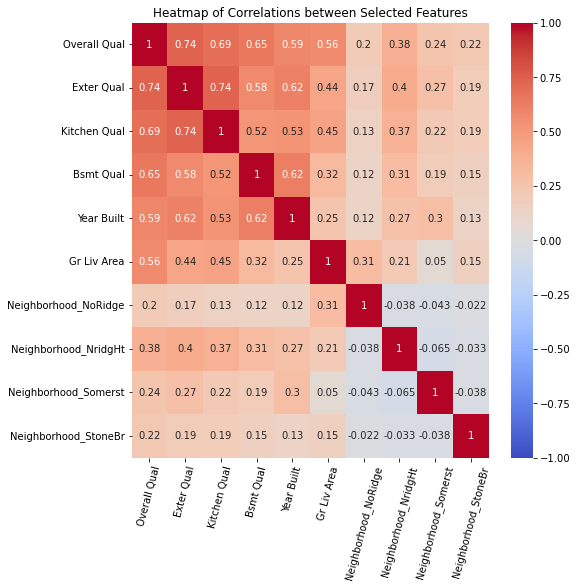

In [187]:
# Create correlations dataframe
correlations = X_train[correlation_features].corr()

# Plot heatmap of correlations between features in training data
plt.figure(figsize=(8,8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=75)
plt.title("Heatmap of Correlations between Selected Features");

The above heatmap shows that we may have some collinearity issues between several of our features. In particular, our 4 features that rate quality of the property all of have correlation values with each other greater than 0.5.

Based on our analysis of the LINE(M) assumptions, we should be wary of relying too heavily on any insights we may find from analyzing the coefficients calculated by our linear regression model. In particular, any insight from the coefficients for the quality variables will be likely imprecise due to possible multi-collinearity issues.

### Conclusions and Recommendations
---

To conclude, I created models that can predict the market price of real estate in Ames, Iowa, considerably better than the baseline model. However, I do think there’s room for improvement. To increase the accuracy of my model, my next steps would be:
1. Addressing outliers in the data of my selected features
2. Revisiting the complete dataset to find additional features to include in the model; and
3. Experimenting with the data to create new features that may help improve the accuracy of my model.
